In [2]:
import os
import sys
import json

PYCOFBUILDER_PATH = "/home/felipe/Github/pyCOFBuilder/"

sys.path.append(os.path.join(PYCOFBUILDER_PATH, 'src'))

import pycofbuilder as pcb
from pycofbuilder.cjson import ChemJSON


# Creation of new building blocks

All the files required to generate a building block (organic core, connection group, and functional group) can be created in the same way:

- First you need to create the structure file using you preferred software (e.g. Avogadro, GaussView, etc.)
- Then, you need to convert it to a ChemicalJSON format (`.csjon`). Although this can be done it directly with the Avogadro software, we recommend to use the `ChemJSON` module avalilable within pyCOFBuilder. This module allows conversion from several molecular formats (*e.g.* `.xyz`, `.gjf`, etc) to `.cjson` in manner that is fully compatible with the pyCOFBuilder library.
- You can add some aditional properties such as the smile code, the 4-letter code, and the xsmiles label for the structure that is being created.  
- Save the `.cjson` file in the proper folder on the `pyCOFbuilder/src/pycofbuilder/data` folder.

#### **Don't forget to add the special points (Q, X, or R<sub>y</sub>) in the structure of the molecule you want to add as in the image below!**

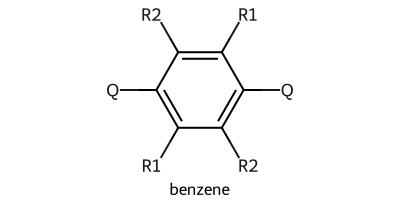

For organic cores by default the distance `Q-C` should be set to 0.5 angstroms and the distance `Ry-C` should be set to 1.0 angstrom.

For the connection groups and functional groups by default the distance from the connection points, `X` and `R` respectivelly, should be set in a way to get the final espected distance between the connection points of the building block and the linkers.

Below there is an example of how to create a new building block using the `ChemicalJSON` module.

To help the process of creating a `xsmile` string and `xsmile label` for your new building block, you can use the `smiles_to_xsmiles` function available on tools.

In [3]:
from pycofbuilder.tools import smiles_to_xsmiles

smiles_string = '[Q]C1=C([Q])C([R1])=C([Q])C([Q])=C1[R1]'

xsmiles, xsmiles_label, composition = smiles_to_xsmiles(smiles_string)

print('smiles:', smiles_string)
print('xsmiles:', xsmiles)
print('xsmiles_label:', xsmiles_label)
print('composition:', composition)

smiles: [Q]C1=C([Q])C([R1])=C([Q])C([Q])=C1[R1]
xsmiles: [*]C1=C([*])C([*])=C([*])C([*])=C1[*]
xsmiles_label: |$Q;;;Q;;R1;;Q;;Q;;R1$|
composition: R12C6Q4


In [9]:
# Create an empty ChemJSON object
new_BB = ChemJSON()

path = os.path.join(PYCOFBUILDER_PATH, 'examples', 'BuildingBlock_creation')
file_name = 'BENZ'
# Read the file conatining the molecular structure
new_BB.from_gjf(path, file_name + '.gjf')

# Define the name of the molecule. This is just a label and it is not used in the creation of the building block
new_BB.name = 'benzene'

# Define the properties of the building block. Although this informations are not required to create the building block, it is 
# recomended to add them in order to take full advantage of the pyCOFBuilder capabilities
new_BB.properties = {
    "smiles": smiles_string,
    "code": file_name,
    "xsmiles": xsmiles,
    "xsmiles_label": xsmiles_label,
}

# Save the ChemJSON object as a cjson file
new_BB.write_cjson(path, file_name + '.cjson')

You can use the `Draw` module from rdkit to visualize the structure of the building block. For that you have to install `rdkit` on your conda environment. To do that just open a new terminal with the pycofbuilder environment activated and type

```bash
conda install -f conda-forge rdkit
```

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

scaffold = Chem.MolFromSmiles(new_BB.properties['xsmiles'] + ' ' + new_BB.properties['xsmiles_label'])

Draw.MolToImage(scaffold, legend=new_BB.name, size=(400, 200))